In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Retail_Sales_Data.csv')
df.head()

invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon

In [4]:
df.describe()

age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [7]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [8]:
USM = df['shopping_mall'].unique()
USM

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [9]:
UC = df['category'].unique()
UC

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [12]:
tran_count_by_shopping_mall = df['shopping_mall'].value_counts()

In [13]:
tran_count_by_shopping_mall

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [16]:
relevant_col = df[["shopping_mall", "price", "category"]]
relevant_col

shopping_mall    price         category
0                Kanyon  1500.40         Clothing
1        Forum Istanbul  1800.51            Shoes
2             Metrocity   300.08         Clothing
3          Metropol AVM  3000.85            Shoes
4                Kanyon    60.60            Books
...                 ...      ...              ...
99452            Kanyon    58.65         Souvenir
99453    Forum Istanbul    10.46  Food & Beverage
99454         Metrocity    10.46  Food & Beverage
99455      Istinye Park  4200.00       Technology
99456  Mall of Istanbul    35.19         Souvenir

[99457 rows x 3 columns]

In [18]:
sale_by_region = df.groupby('shopping_mall')['price'].sum()
sale_by_region

shopping_mall
Cevahir AVM           3433671.84
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Istinye Park          6717077.54
Kanyon               13710755.24
Mall of Istanbul     13851737.62
Metrocity            10249980.07
Metropol AVM          6937992.99
Viaport Outlet        3414019.46
Zorlu Center          3509649.02
Name: price, dtype: float64

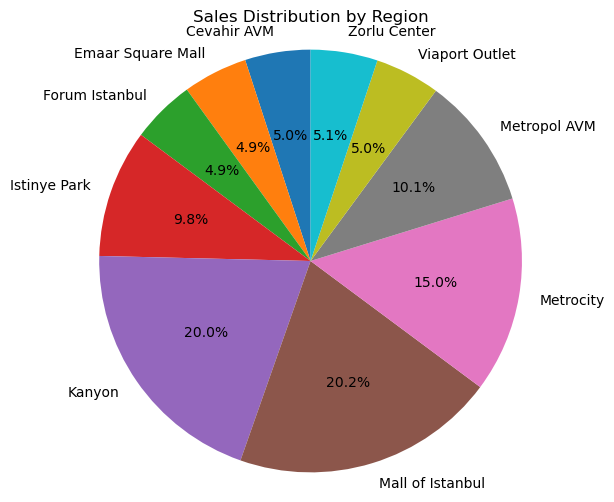

In [21]:
plt.figure(figsize=(6,6))
plt.pie(sale_by_region, labels=sale_by_region.index, autopct="%1.1f%%", startangle=90)
plt.title("Sales Distribution by Region")
plt.axis("Equal")
plt.show()

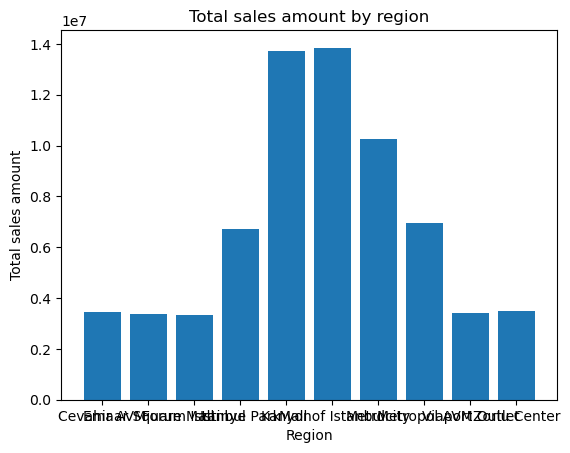

In [24]:
plt.figure()
plt.bar(sale_by_region.index, sale_by_region.values)
plt.xlabel('Region')
plt.ylabel('Total sales amount')
plt.title('Total sales amount by region')
plt.show()

In [26]:
top_region = sale_by_region.sort_values(ascending=False).head()
print("Top Performance Region:") 
top_region

Top Performance Region:


shopping_mall
Mall of Istanbul    13851737.62
Kanyon              13710755.24
Metrocity           10249980.07
Metropol AVM         6937992.99
Istinye Park         6717077.54
Name: price, dtype: float64

In [27]:
sale_by_region_category = df.groupby(['shopping_mall','category']) ['price'].sum()
sale_by_region_category

shopping_mall  category       
Cevahir AVM    Books                11998.80
               Clothing           1554414.40
               Cosmetics            88394.84
               Food & Beverage      11992.39
               Shoes               884050.41
                                     ...    
Zorlu Center   Food & Beverage      11589.68
               Shoes               953670.13
               Souvenir              8398.68
               Technology          803250.00
               Toys                 54691.84
Name: price, Length: 80, dtype: float64

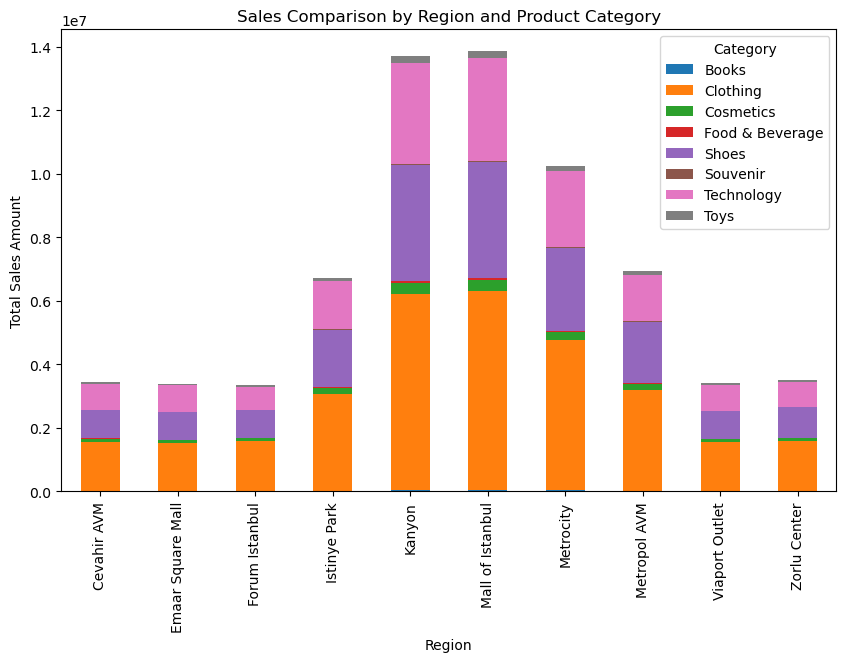

In [29]:
sale_by_region_category.unstack().plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Sales Comparison by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.legend(title="Category")
plt.show()